In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
os.chdir('../')
from python_code import glm_fitter as glm
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')

In [2]:
data = pd.read_csv('../data/wdbc.csv', header=None)
data.iloc[:,1] = (data.iloc[:,1] == 'M').astype(int)
X = np.array(data.iloc[:,2:12])
y = np.array(data.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1e-5, random_state=40)

In [3]:
clf = glm.LogisticRegression(fit_intercept=True, max_iteration=100000, learning_rate = 0.01, tol=1e-8)
clf.fit(X_train, y_train, method='Gradient descent')

 24%|█████████████████████████████████████████▍                                                                                                                                     | 23705/100000 [00:01<00:04, 16148.73it/s]


'Tolerance achieved'

In [4]:
clf.betas

array([ 0.45723793, -5.28042049,  1.65287054, -3.46811187, 13.64178921,
        1.05762991,  0.02060086,  0.69224481,  2.61241941,  0.4436086 ,
       -0.48763604])

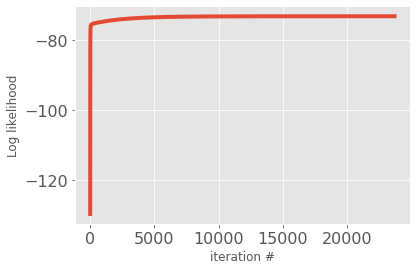

In [5]:
iterations = np.linspace(0,clf.last_iteration, clf.last_iteration)
plt.plot(iterations, clf.log_likelihood)
plt.xlabel('iteration #')
plt.ylabel('Log likelihood');

In [6]:
clf.log_likelihood[-1]

-73.07424412161092

In [7]:
def test_sk(X_train, y_train):
    X_sk = clf._scale_data(X_train)
    skl_clf = LogisticRegression(fit_intercept=True, solver='newton-cg', C=1000)
    skl_clf.fit(X_sk, y_train)
    betas_sk = np.concatenate((skl_clf.intercept_.flatten(), skl_clf.coef_.flatten()))
    skl_standard_error = clf.calculate_standard_error(betas_sk.flatten(),  clf._make_intercept(X_sk))
    return betas_sk, skl_standard_error
    

In [8]:
betas_sk, skl_standard_error = test_sk(X_train, y_train)

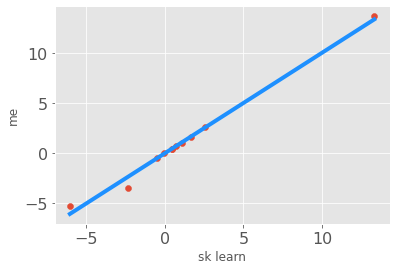

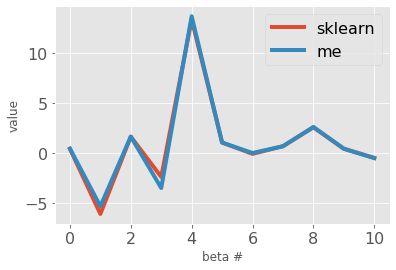

In [9]:
fig, ax = plt.subplots()
ax.scatter(betas_sk, clf.betas)
plt.plot([betas_sk.min(), betas_sk.max()],[betas_sk.min(), betas_sk.max()], color='dodgerblue')
ax.set_xlabel('sk learn')
ax.set_ylabel('me')
plt.figure()
plt.plot(betas_sk, label='sklearn')
plt.plot(clf.betas, label='me')
plt.legend()
plt.xlabel('beta #')
plt.ylabel('value');

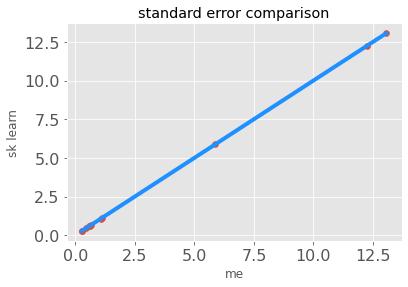

In [10]:
fig, ax = plt.subplots()
ax.scatter(clf.standard_error, skl_standard_error)
plt.plot([skl_standard_error.min(), skl_standard_error.max()],[skl_standard_error.min(), skl_standard_error.max()], color='dodgerblue')

ax.set_xlabel('me')
ax.set_ylabel('sk learn');
ax.set_title('standard error comparison');

### try linear reg

In [11]:
from scipy.stats import norm
dist = norm(0,1)
x = np.linspace(0,10,100)
y = x + dist.rvs(size=100)

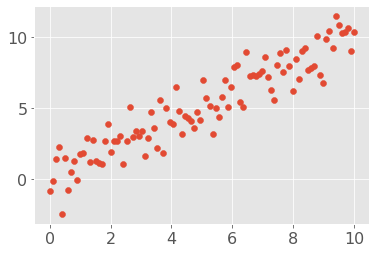

In [12]:
plt.scatter(x, y)

In [13]:
lr = glm.LinearRegression(fit_intercept=True,learning_rate = 0.01, scale=False)

In [14]:
lr.fit(x.reshape(-1,1), y, method='Newton')

  7%|████████████▊                                                                                                                                                                      | 575/8000 [00:00<00:00, 14995.12it/s]


'Tolerance achieved'

In [15]:
lr.betas

array([0.11925362, 1.00308563])

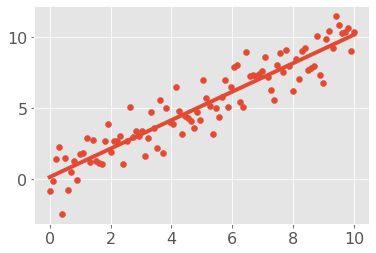

In [16]:
plt.plot(x, lr.predict(x.reshape(-1,1)))
plt.scatter(x, y);